**Table of contents**<a id='toc0_'></a>    
- 1. [前言](#toc1_)    
- 2. [数据](#toc2_)    
- 3. [特征工程](#toc3_)    
  - 3.1. [特征选择](#toc3_1_)    
    - 3.1.1. [过滤法（Filter）：先算分数，再选特征](#toc3_1_1_)    
      - 3.1.1.1. [SelectKBest](#toc3_1_1_1_)    
      - 3.1.1.2. [VarianceThreshold](#toc3_1_1_2_)    
    - 3.1.2. [包装法（Wrapper）：迭代试探最优特征组合](#toc3_1_2_)    
      - 3.1.2.1. [ RFE（递归特征消除）](#toc3_1_2_1_)    
      - 3.1.2.2. [RFECV（带交叉验证的 RFE）](#toc3_1_2_2_)    
    - 3.1.3. [嵌入法（Embedded）：模型自动决定重要性](#toc3_1_3_)    
      - 3.1.3.1. [SelectFromModel](#toc3_1_3_1_)    
  - 3.2. [特征提取](#toc3_2_)    
    - 3.2.1. [PCA降维](#toc3_2_1_)    
    - 3.2.2. [kernel PCA降维](#toc3_2_2_)    
    - 3.2.3. [LDA降维](#toc3_2_3_)    
    - 3.2.4. [TSNE](#toc3_2_4_)    
    - 3.2.5. [UMAP降维](#toc3_2_5_)    
  - 3.3. [聚类 （无监督学习）](#toc3_3_)    
    - 3.3.1. [KMeans 聚类（最常用）](#toc3_3_1_)    
    - 3.3.2. [DBSCAN 聚类（适合密度聚类）](#toc3_3_2_)    
    - 3.3.3. [层次聚类（Agglomerative）](#toc3_3_3_)    
    - 3.3.4. [聚类效果评估](#toc3_3_4_)    
    - 3.3.5. [选择最优簇数：肘部法则（KMeans）](#toc3_3_5_)    
- 4. [拆分数据](#toc4_)    
- 5. [模型选择与调参](#toc5_)    
  - 5.1. [快速对比多个模型的方式](#toc5_1_)    
  - 5.2. [超参数调优：GridSearchCV（网格搜索）](#toc5_2_)    
  - 5.3. [随机搜索：RandomizedSearchCV（更快）](#toc5_3_)    
  - 5.4. [可视化学习曲线与验证曲线](#toc5_4_)    
- 6. [训练](#toc6_)    
- 7. [评估](#toc7_)    
  - 7.1. [分类模型评估指标（sklearn.metrics）](#toc7_1_)    
  - 7.2. [二分类：ROC 曲线 和 AUC](#toc7_2_)    
  - 7.3. [回归模型常用指标](#toc7_3_)    
  - 7.4. [交叉验证评估](#toc7_4_)    
- 8. [调参](#toc8_)    
  - 8.1. [模型参数选择](#toc8_1_)    
- 9. [集成学习](#toc9_)    
  - 9.1. [Bagging（以随机森林为代表）](#toc9_1_)    
  - 9.2. [Boosting（以梯度提升树为代表）](#toc9_2_)    
  - 9.3. [Voting（简单模型组合）](#toc9_3_)    
  - 9.4. [Stacking（堆叠模型）](#toc9_4_)    
  - 9.5. [快速对比集成模型](#toc9_5_)    
  - 9.6. [何时选择哪种集成方法？](#toc9_6_)    
- 10. [保存模型](#toc10_)    
  - 10.1. [使用 joblib（推荐方式）](#toc10_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[前言](#toc0_)

> Sklearn 的标准流程是：数据准备 → 特征工程 → 拆分数据 → 选择模型 → 训练 → 评估 → 调参 → 保存模型。

# 2. <a id='toc2_'></a>[数据](#toc0_)

In [22]:
import pandas as pd 


df = pd.read_csv(
    "./datas/iris/iris.data", 
    names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], 
    header= None
)

# 宽表
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


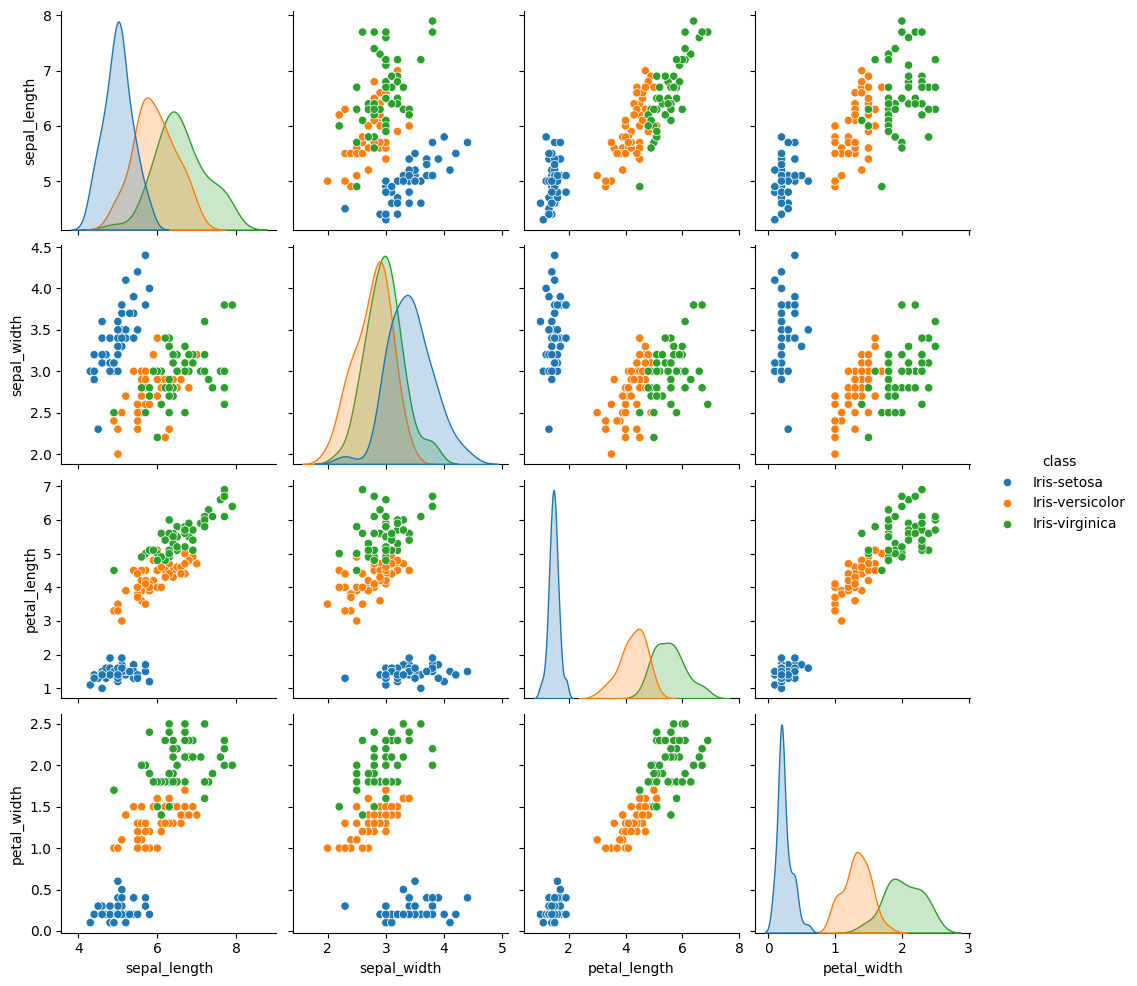

In [23]:
import seaborn as sns 
sns.pairplot(df, hue= "class")

对相应数据进行标准化操作后，查看数据的分布情况，数据分布情况如下：

In [24]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
df.iloc[:, :-1] = sc.fit_transform(df.iloc[:, :-1])
print(f"mean: {sc.mean_}")
print(f"var: {sc.var_}")
df

mean: [5.84333333 3.054      3.75866667 1.19866667]
var: [0.68112222 0.18675067 3.09242489 0.57853156]


,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,0.432165,0.800654,0.933356,1.447956,Iris-virginica


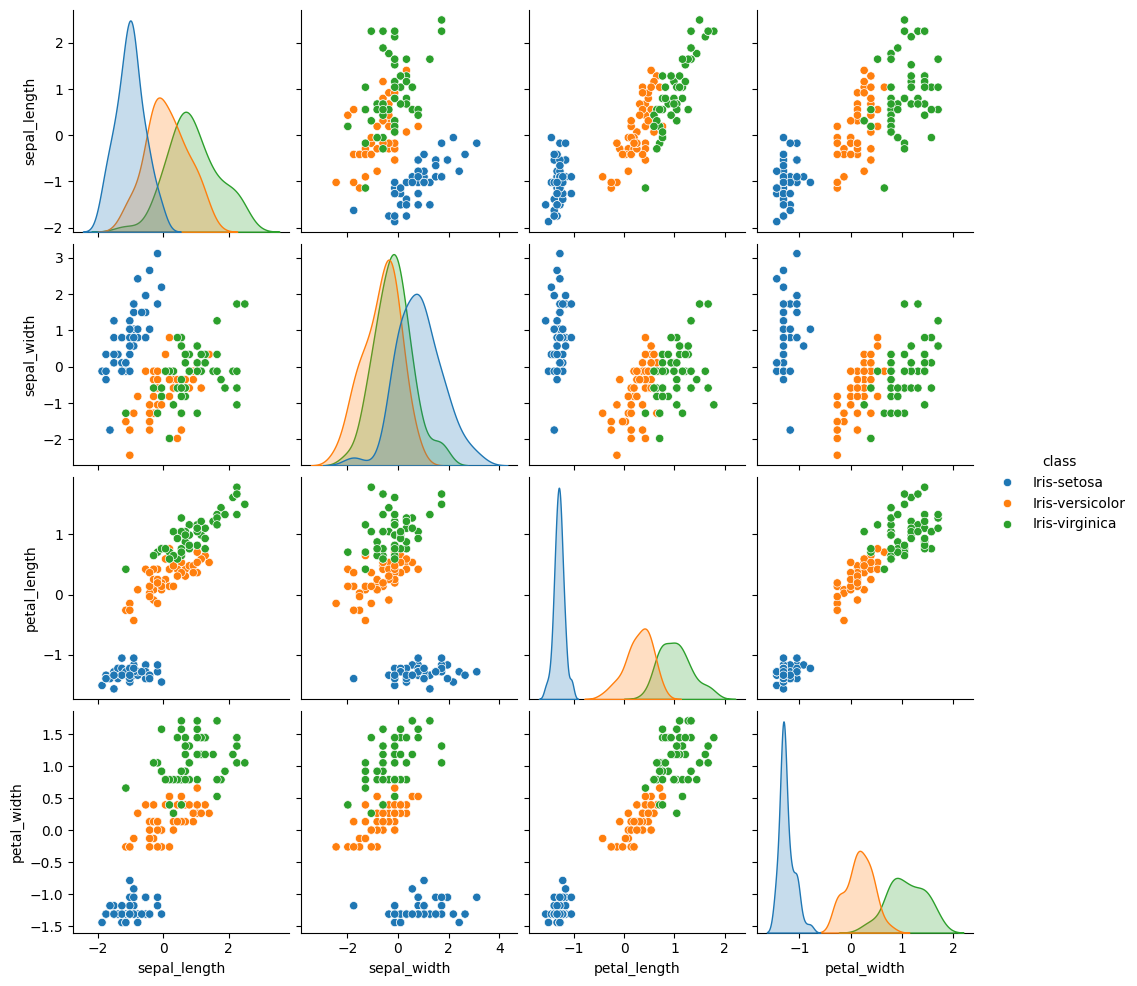

In [25]:
sns.pairplot(df, hue= "class")
# 标准化并不影响数据间的关系

# 3. <a id='toc3_'></a>[特征工程](#toc0_)

- 特征选择
- 特征提取：
  - 线性模型：有监督LDA, 无监督PCA
  - 非线性模型：无监督t-SNE，无监督UMAP，无监督kernel PCA


## 3.1. <a id='toc3_1_'></a>[特征选择](#toc0_)


<img src="./Pictures/feature_selection.png" alt="特征选择" style="zoom: 60%;" />


✅ sklearn 中特征选择的三大类方法：

| 类别               | 特点            | 代表方法                               | 适用模块                        |
| ---------------- | ------------- | ---------------------------------- | --------------------------- |
| 1. 过滤法（Filter）   | 不依赖模型，仅基于统计指标 | `SelectKBest`, `VarianceThreshold` | `sklearn.feature_selection` |
| 2. 包装法（Wrapper）  | 用模型评估特征子集表现   | `RFE`, `RFECV`                     | `sklearn.feature_selection` |
| 3. 嵌入法（Embedded） | 用模型自身的特征重要性   | `SelectFromModel`, L1 正则           | `sklearn.feature_selection` |

✅ 总结对比表:

| 方法                  | 依赖模型 | 特点      | 适用场景    |
| ------------------- | ---- | ------- | ------- |
| `SelectKBest`       | ❌    | 快速、可解释  | 初步筛选    |
| `VarianceThreshold` | ❌    | 简单去除低方差 | 去噪      |
| `RFE`, `RFECV`      | ✅    | 精准但慢    | 小数据     |
| `SelectFromModel`   | ✅    | 依赖模型系数  | 大数据，树模型 |


### 3.1.1. <a id='toc3_1_1_'></a>[过滤法（Filter）：先算分数，再选特征](#toc0_)

#### 3.1.1.1. <a id='toc3_1_1_1_'></a>[SelectKBest](#toc0_)

**从全部特征中选出得分最高的 K 个：**


常见 score_func：

| 函数                    | 适用类型 | 含义          |
| --------------------- | ---- | ----------- |
| `f_classif`           | 分类   | 方差分析 F 值    |
| `chi2`                | 分类   | 卡方统计量（要求非负） |
| `mutual_info_classif` | 分类   | 互信息         |
| `f_regression`        | 回归   | F 值         |


In [75]:
from sklearn.feature_selection import SelectKBest, f_classif 


selector = SelectKBest(score_func= f_classif, k= 2)
selector_array = selector.fit_transform(df.iloc[:, :-1], df.iloc[:, -1])
selector_array[0:3], df.iloc[0:3, :]
# 选择了petal_length, petal_width

(array([[-1.3412724 , -1.31297673],
        [-1.3412724 , -1.31297673],
        [-1.39813811, -1.31297673]]),
    sepal_length  sepal_width  petal_length  petal_width        class
 0     -0.900681     1.032057     -1.341272    -1.312977  Iris-setosa
 1     -1.143017    -0.124958     -1.341272    -1.312977  Iris-setosa
 2     -1.385353     0.337848     -1.398138    -1.312977  Iris-setosa)

<Axes: xlabel='petal_length', ylabel='petal_width'>

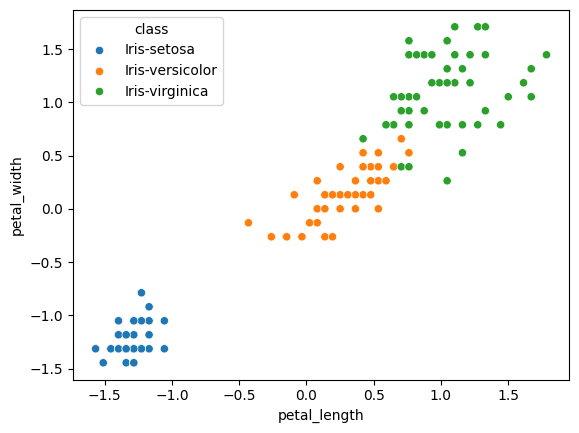

In [77]:
selector_df = pd.DataFrame(selector_array, columns= ['petal_length', 'petal_width'])
selector_df['class'] = df.iloc[:, -1]
sns.scatterplot(selector_df, x= 'petal_length', y= 'petal_width', hue= 'class')

#### 3.1.1.2. <a id='toc3_1_1_2_'></a>[VarianceThreshold](#toc0_)

去除方差低于某个阈值的特征：

In [83]:
from sklearn.feature_selection import VarianceThreshold 


vt = VarianceThreshold(threshold= 0.5)
vt_array = vt.fit_transform(df.iloc[:, :-1])

vt_array[0:3], df.iloc[0:3, :]

(array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
        [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
        [-1.38535265,  0.33784833, -1.39813811, -1.31297673]]),
    sepal_length  sepal_width  petal_length  petal_width        class
 0     -0.900681     1.032057     -1.341272    -1.312977  Iris-setosa
 1     -1.143017    -0.124958     -1.341272    -1.312977  Iris-setosa
 2     -1.385353     0.337848     -1.398138    -1.312977  Iris-setosa)

### 3.1.2. <a id='toc3_1_2_'></a>[包装法（Wrapper）：迭代试探最优特征组合](#toc0_)

#### 3.1.2.1. <a id='toc3_1_2_1_'></a>[ RFE（递归特征消除）](#toc0_)

逐步移除最不重要的特征，留下你指定的数量：

In [ ]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
# 递归特征消除

rfe = RFE(estimator= LogisticRegression(), n_features_to_select= 2)
rfe_array = rfe.fit_transform(df.iloc[:, :-1], df.iloc[:, -1])
rfe_array[0:3], df.iloc[0:3, :]

# 选择了最后两列

(array([[-1.3412724 , -1.31297673],
        [-1.3412724 , -1.31297673],
        [-1.39813811, -1.31297673]]),
    sepal_length  sepal_width  petal_length  petal_width        class
 0     -0.900681     1.032057     -1.341272    -1.312977  Iris-setosa
 1     -1.143017    -0.124958     -1.341272    -1.312977  Iris-setosa
 2     -1.385353     0.337848     -1.398138    -1.312977  Iris-setosa)

#### 3.1.2.2. <a id='toc3_1_2_2_'></a>[RFECV（带交叉验证的 RFE）](#toc0_)

自动选出最优特征数量：

In [92]:
from sklearn.feature_selection import RFECV


refecv = RFECV(estimator= LogisticRegression(), step= 1, cv= 10)
refecv_array = refecv.fit_transform(df.iloc[:, :-1], df.iloc[:, -1])
refecv_array[0:3], df.iloc[0:3, :]

# 选择了最后一列

(array([[-1.31297673],
        [-1.31297673],
        [-1.31297673]]),
    sepal_length  sepal_width  petal_length  petal_width        class
 0     -0.900681     1.032057     -1.341272    -1.312977  Iris-setosa
 1     -1.143017    -0.124958     -1.341272    -1.312977  Iris-setosa
 2     -1.385353     0.337848     -1.398138    -1.312977  Iris-setosa)

### 3.1.3. <a id='toc3_1_3_'></a>[嵌入法（Embedded）：模型自动决定重要性](#toc0_)

#### 3.1.3.1. <a id='toc3_1_3_1_'></a>[SelectFromModel](#toc0_)

利用模型的 .feature_importances_ 或 .coef_：

In [ ]:
from sklearn.feature_selection import SelectFromModel 
from sklearn.ensemble import RandomForestClassifier


sfm = SelectFromModel(RandomForestClassifier())
sfm_array = sfm.fit_transform(df.iloc[:, :-1], df.iloc[:, -1])
sfm_array[0:3], df.iloc[0:3, :]

# 选择了最后两列

(array([[-1.3412724 , -1.31297673],
        [-1.3412724 , -1.31297673],
        [-1.39813811, -1.31297673]]),
    sepal_length  sepal_width  petal_length  petal_width        class
 0     -0.900681     1.032057     -1.341272    -1.312977  Iris-setosa
 1     -1.143017    -0.124958     -1.341272    -1.312977  Iris-setosa
 2     -1.385353     0.337848     -1.398138    -1.312977  Iris-setosa)

也支持 L1 正则稀疏（如 Lasso 回归）：

In [ ]:
from sklearn.linear_model import Lasso


sfm_lasso = SelectFromModel(Lasso(alpha= 0.01))
sfm_lasso_array = sfm_lasso.fit_transform(df.iloc[:, :-1], df.iloc[:, -1])
sfm_lasso_array[0:3], df.iloc[0:3, :]

## 3.2. <a id='toc3_2_'></a>[特征提取](#toc0_)


✅ 总结一句话：
- 如果你要做降维建模 → 用 PCA 或 LDA；
- 如果你要做数据可视化 → 用 t-SNE 或 UMAP。

🧠 在 sklearn 中常用的降维 / 特征提取方法汇总:

| 方法                            | 类别     | 是否监督 | 适用场景           | sklearn 类名                                                 |
| ----------------------------- | ------ | ---- | -------------- | ---------------------------------------------------------- |
| PCA                           | 线性降维   | 否    | 方差最大           | `sklearn.decomposition.PCA`                                |
| LDA                           | 线性降维   | ✅ 是  | 分类任务           | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` |
| ICA                           | 非监督    | 否    | 独立信号提取（如脑电）    | `sklearn.decomposition.FastICA`                            |
| NMF                           | 非负矩阵分解 | 否    | 图像/文本特征提取      | `sklearn.decomposition.NMF`                                |
| TruncatedSVD                  | 稀疏矩阵降维 | 否    | 文本（TF-IDF）推荐系统 | `sklearn.decomposition.TruncatedSVD`                       |
| Kernel PCA                    | 非线性降维  | 否    | 非线性特征          | `sklearn.decomposition.KernelPCA`                          |
| t-SNE                         | 可视化    | 否    | 高维可视化          | `sklearn.manifold.TSNE`                                    |
| Isomap                        | 非线性    | 否    | 保持流形结构         | `sklearn.manifold.Isomap`                                  |
| MDS                           | 多维尺度分析 | 否    | 距离可视化          | `sklearn.manifold.MDS`                                     |
| UMAP                          | 可视化    | 否    | 替代 t-SNE       | `umap.UMAP`（外部库）                                           |
| Feature Agglomeration         | 层次聚类   | 否    | 特征合并           | `sklearn.cluster.FeatureAgglomeration`                     |
| SelectKBest / SelectFromModel | 特征选择   | 是    | 回归或分类          | `sklearn.feature_selection` 模块                             |


### 3.2.1. <a id='toc3_2_1_'></a>[PCA降维](#toc0_)

| 项目        | 建议                                     |
| --------- | -------------------------------------- |
| 是否需要标准化？  | **一定需要**，因为 PCA 对特征尺度敏感                |
| 主成分个数怎么选？ | 用 `explained_variance_ratio_` 决定保留多少信息 |
| 降维是否总是有益？ | 对高维数据有用，低维数据反而可能损失信息                   |


In [ ]:
from sklearn.decomposition import PCA 


# PCA 降维（保留 95% 方差 或 指定维数）
pca = PCA(n_components= 0.95) # 或 n_components= 2
pca_array = pca.fit_transform(df.iloc[:, :-1])


# 解释方差比率
print(f"explained variance ratio: {pca.explained_variance_ratio_}")
# 解释方差
print(f"explained variance: {pca.explained_variance_}")
# 奇异值
print(f"singular values: {pca.singular_values_}")
# 主成分矩阵（特征向量矩阵）
print(f"components: {pca.components_}")

explained variance ratio: [0.72770452 0.23030523]
explained variance: [2.93035378 0.92740362]
singular values: [20.89551896 11.75513248]
components: [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


<Axes: xlabel='PC1', ylabel='PC2'>

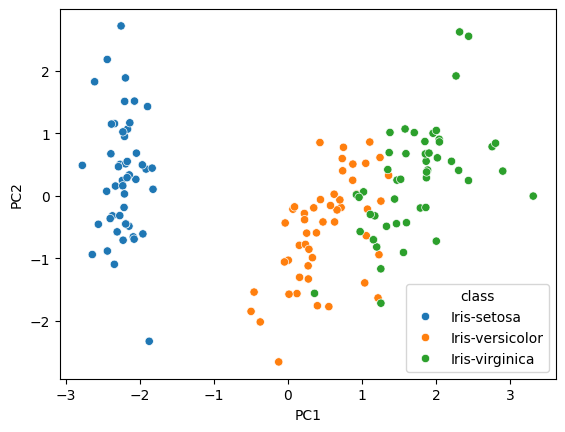

In [55]:
pca_df = pd.DataFrame(data = pca_array, columns = [f"PC{i+1}" for i in range(pca_array.shape[1])])
pca_df["class"] = df["class"].values
sns.scatterplot(data= pca_df, x= "PC1", y= "PC2", hue= "class")

### 3.2.2. <a id='toc3_2_2_'></a>[kernel PCA降维](#toc0_)

In [67]:
from sklearn.decomposition import KernelPCA 


kernel_pca = KernelPCA(n_components= 2, kernel= "rbf", gamma= 0.1)
kernel_pca_array = kernel_pca.fit_transform(df.iloc[:, :-1])

<Axes: xlabel='PC1', ylabel='PC2'>

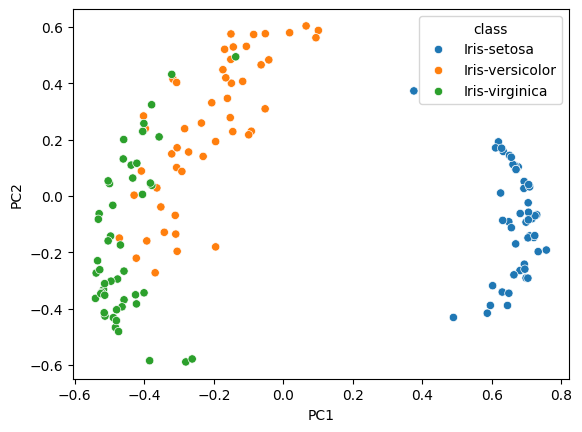

In [68]:
kernel_pca_df = pd.DataFrame(data = kernel_pca_array, columns = [f"PC{i+1}" for i in range(kernel_pca_array.shape[1])])
kernel_pca_df["class"] = df["class"].values
sns.scatterplot(data= kernel_pca_df, x= "PC1", y= "PC2", hue= "class")

### 3.2.3. <a id='toc3_2_3_'></a>[LDA降维](#toc0_)

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


lda = LDA(n_components= 2)
lda_array = lda.fit_transform(df.iloc[:, :-1], df.iloc[:, -1])


# 主成分
print(f"components: {lda.scalings_}")

components: [[ 0.67614337 -0.0271192 ]
 [ 0.66890811 -0.93115101]
 [-3.84228173  1.63586613]
 [-2.17067434 -2.13428251]]


<Axes: xlabel='LD1', ylabel='LD2'>

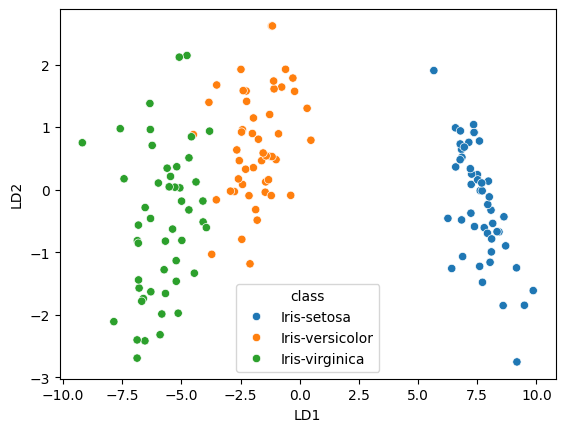

In [58]:
lda_df = pd.DataFrame(data = lda_array, columns = [f"LD{i+1}" for i in range(lda_array.shape[1])])
lda_df["class"] = df["class"].values
sns.scatterplot(data= lda_df, x= "LD1", y= "LD2", hue= "class")
# 线性判别分析（LDA）是有监督的降维方法

### 3.2.4. <a id='toc3_2_4_'></a>[TSNE](#toc0_)

In [62]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components= 2)
tsne_array = tsne.fit_transform(df.iloc[:, :-1])
# t-SNE

<Axes: xlabel='t-SNE1', ylabel='t-SNE2'>

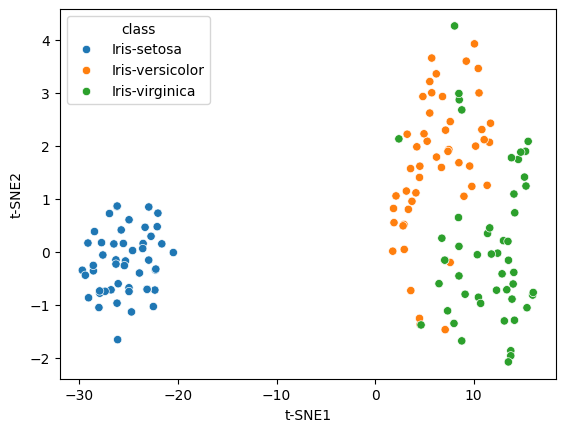

In [63]:
tsne_df = pd.DataFrame(data = tsne_array, columns = [f"t-SNE{i+1}" for i in range(tsne_array.shape[1])])
tsne_df["class"] = df["class"].values
sns.scatterplot(data= tsne_df, x= "t-SNE1", y= "t-SNE2", hue= "class")
# t-SNE 是非线性降维方法

### 3.2.5. <a id='toc3_2_5_'></a>[UMAP降维](#toc0_)

In [ ]:
# !pip install umap-learn

In [64]:
import umap 

umap_model = umap.UMAP(n_components= 2)
umap_array = umap_model.fit_transform(df.iloc[:, :-1])

d:\ProgramFiles\miniconda3\envs\deeplearning\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: xlabel='UMAP1', ylabel='UMAP2'>

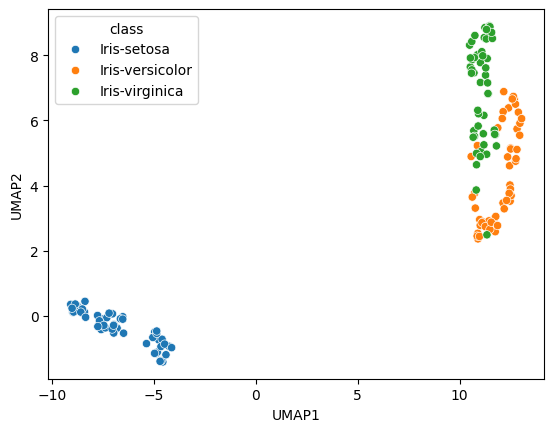

In [65]:
umap_df = pd.DataFrame(data = umap_array, columns = [f"UMAP{i+1}" for i in range(umap_array.shape[1])])
umap_df["class"] = df["class"].values
sns.scatterplot(data= umap_df, x= "UMAP1", y= "UMAP2", hue= "class")
# UMAP 是非线性降维方法

## 3.3. <a id='toc3_3_'></a>[聚类 （无监督学习）](#toc0_)

✅ 常见聚类算法（scikit-learn）：

| 算法                       | 模块                                        | 特点              |
| ------------------------ | ----------------------------------------- | --------------- |
| KMeans                   | `sklearn.cluster.KMeans`                  | 简单快速，需指定簇数      |
| DBSCAN                   | `sklearn.cluster.DBSCAN`                  | 可发现任意形状簇，抗噪能力强  |
| MeanShift                | `sklearn.cluster.MeanShift`               | 不需指定簇数，适合密度可变数据 |
| Agglomerative Clustering | `sklearn.cluster.AgglomerativeClustering` | 层次聚类，适合可解释性强的任务 |
| Spectral Clustering      | `sklearn.cluster.SpectralClustering`      | 适合复杂边界和图结构数据    |


✅ 总结对比:

| 算法        | 是否需指定簇数 | 优点           | 缺点            |
| --------- | ------- | ------------ | ------------- |
| KMeans    | ✅ 是     | 快速、适合大数据     | 需指定 k，簇为球形    |
| DBSCAN    | ❌ 否     | 可发现任意形状簇，抗噪强 | 对参数敏感，难处理不同密度 |
| MeanShift | ❌ 否     | 自动确定簇数       | 慢，不适合大数据      |
| 层次聚类      | ✅       | 可视化好解释       | 计算复杂度高        |
| Spectral  | ✅       | 适合复杂结构       | 内部较复杂         |


### 3.3.1. <a id='toc3_3_1_'></a>[KMeans 聚类（最常用）](#toc0_)

- n_clusters：指定分几类

- labels_：聚类结果

- inertia_：簇内误差平方和，可用于肘部法则选择最佳 K

C:\Users\zhao\AppData\Local\Temp\ipykernel_23252\2527157897.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


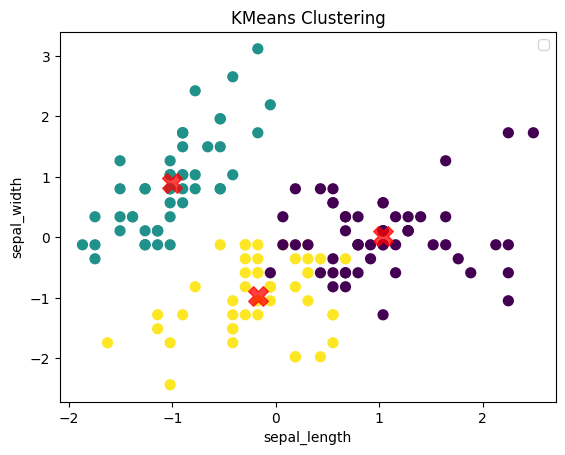

In [149]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters= 3, random_state= 123)
kmeans.fit(df.iloc[:, :-1])

labels = kmeans.labels_ # 每个样本的聚类标签
centroids = kmeans.cluster_centers_ # 聚类中心


plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c= labels, s= 50, cmap= "viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], c= "red", s= 200, alpha= 0.75, marker= "X")
plt.title("KMeans Clustering")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()

### 3.3.2. <a id='toc3_3_2_'></a>[DBSCAN 聚类（适合密度聚类）](#toc0_)

- eps：最大邻域距离

- min_samples：核心点的最小邻居数

- 可识别噪声点（label 为 -1）

Text(0, 0.5, 'sepal_width')

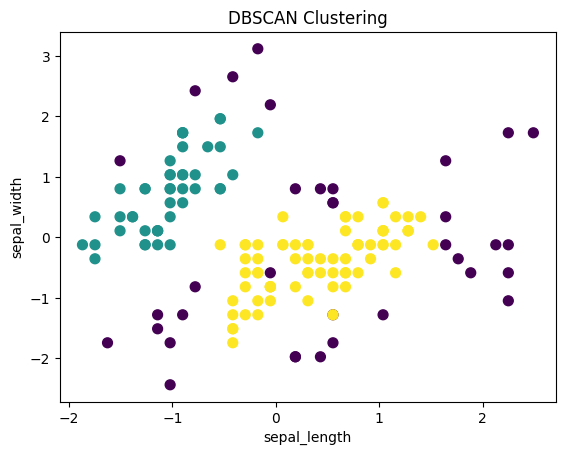

In [152]:
from sklearn.cluster import DBSCAN 


dbscan = DBSCAN(eps= 0.5, min_samples= 5)
dbscan.fit(df.iloc[:, :-1])

labels = dbscan.labels_ # 每个样本的聚类标签

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c= labels, s= 50, cmap= "viridis")
plt.title("DBSCAN Clustering")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
# plt.legend()

### 3.3.3. <a id='toc3_3_3_'></a>[层次聚类（Agglomerative）](#toc0_)

Text(0, 0.5, 'sepal_width')

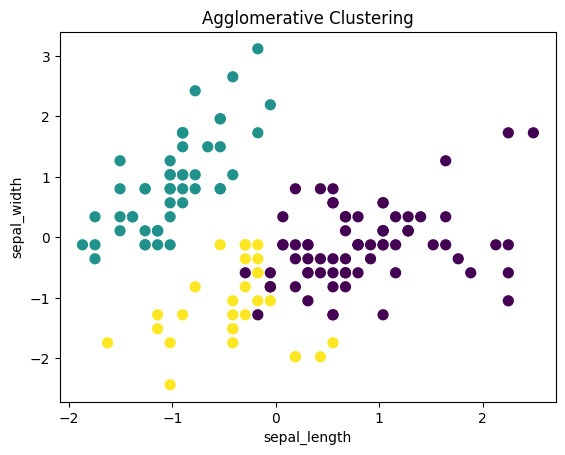

In [154]:
from sklearn.cluster import AgglomerativeClustering 


agg_clustering = AgglomerativeClustering(n_clusters= 3)
agg_clustering.fit(df.iloc[:, :-1])

labels = agg_clustering.labels_ # 每个样本的聚类标签\

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c= labels, s= 50, cmap= "viridis")
plt.title("Agglomerative Clustering")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")


### 3.3.4. <a id='toc3_3_4_'></a>[聚类效果评估](#toc0_)

- 值范围 -1 到 1，越大聚类效果越好

- 若有真实标签，也可用 adjusted_rand_score, normalized_mutual_info_score 评估

In [155]:
from sklearn.metrics import silhouette_score 


score = silhouette_score(df.iloc[:, :-1], labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.44553956399200406


### 3.3.5. <a id='toc3_3_5_'></a>[选择最优簇数：肘部法则（KMeans）](#toc0_)

- 找“肘部”拐点对应的 k

Text(0, 0.5, 'Inertia')

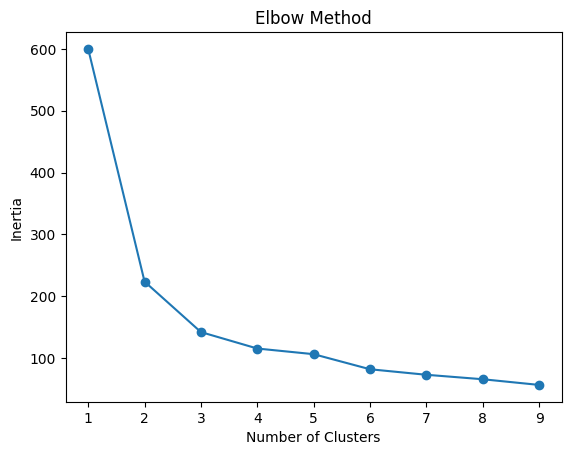

In [156]:
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters= k, random_state= 123)
    kmeans.fit(df.iloc[:, :-1])
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias, marker= "o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

# 4. <a id='toc4_'></a>[拆分数据](#toc0_)

在 scikit-learn 中，拆分数据集 是建模流程中最基础、最关键的一步。它通常用于将原始数据分成：
- 训练集（Train set）：用于训练模型
- 测试集（Test set）：用于评估模型性能
- （可选）验证集（Validation set）：用于调参或模型选择（通常由交叉验证代替）

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,         # 20% 作为测试集
    random_state=42,       # 保证每次划分一样
    stratify=y             # 分类问题推荐加上，保持类别比例一致
)

```

参数解释:

| 参数             | 含义                     |
| -------------- | ---------------------- |
| `X`, `y`       | 原始特征与标签                |
| `test_size`    | 测试集比例（如 0.2）或数量（如 100） |
| `train_size`   | 训练集比例（可选，默认自动算）        |
| `random_state` | 随机种子，保证结果可复现           |
| `stratify`     | 对分类问题，保证训练/测试集中的类别分布一致 |


In [105]:
from sklearn.model_selection import train_test_split 


X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size= 0.2, random_state= 123, stratify= df.iloc[:, -1])

多次拆分的高级用法：交叉验证（Cross-validation）,适用于模型调参或对性能更稳定评估：
- KFold：基础版
- StratifiedKFold：分类任务用，保持类别比例一致


<div style="display:flex;justify-content:center">

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="KFold cross validation" weight=500 width=500>

</div>

In [104]:
from sklearn.model_selection import KFold, StratifiedKFold


kf = KFold(n_splits= 10, shuffle= True, random_state= 123)
for k, (train_index, test_index) in enumerate(kf.split(X_train)):
    print(f"Fold {k+1}, Train index: {train_index.shape}, Test index: {test_index.shape}")

Fold 1, Train index: (108,), Test index: (12,)
Fold 2, Train index: (108,), Test index: (12,)
Fold 3, Train index: (108,), Test index: (12,)
Fold 4, Train index: (108,), Test index: (12,)
Fold 5, Train index: (108,), Test index: (12,)
Fold 6, Train index: (108,), Test index: (12,)
Fold 7, Train index: (108,), Test index: (12,)
Fold 8, Train index: (108,), Test index: (12,)
Fold 9, Train index: (108,), Test index: (12,)
Fold 10, Train index: (108,), Test index: (12,)


# 5. <a id='toc5_'></a>[模型选择与调参](#toc0_)

✅ 在多个模型或多个超参数设置中，选择出表现最好的组合:
- 模型对比（如 SVM vs 决策树 vs 随机森林）
- 超参数调优（如 C, max_depth, n_estimators 等）
- 使用交叉验证评估模型泛化能力


✅ 模型选择核心模块：sklearn.model_selection

| 功能      | 代表函数                                           |
| ------- | ---------------------------------------------- |
| 交叉验证    | `cross_val_score`, `cross_validate`            |
| 超参数搜索   | `GridSearchCV`, `RandomizedSearchCV`           |
| 数据集划分   | `train_test_split`, `StratifiedKFold`, `KFold` |
| 学习/验证曲线 | `learning_curve`, `validation_curve`           |

✅ 总结

| 工具                                    | 作用      |
| ------------------------------------- | ------- |
| `cross_val_score`                     | 多模型快速对比 |
| `GridSearchCV` / `RandomizedSearchCV` | 超参数调优   |
| `learning_curve` / `validation_curve` | 学习行为分析  |
| `train_test_split`, `KFold`           | 数据拆分    |



## 5.1. <a id='toc5_1_'></a>[快速对比多个模型的方式](#toc0_)

In [106]:
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv= 10)
    print(f"{name} - Mean accuracy: {scores.mean():.4f}, Std: {scores.std():.4f}")

Logistic Regression - Mean accuracy: 0.9667, Std: 0.0408
Random Forest - Mean accuracy: 0.9500, Std: 0.0553
SVM - Mean accuracy: 0.9750, Std: 0.0382


## 5.2. <a id='toc5_2_'></a>[超参数调优：GridSearchCV（网格搜索）](#toc0_)

In [107]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(
    estimator= RandomForestClassifier(),
    param_grid= param_grid,
    scoring= "accuracy",
    cv= 10,
    n_jobs= -1
)
grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_:.4f}")

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best score: 0.9583


## 5.3. <a id='toc5_3_'></a>[随机搜索：RandomizedSearchCV（更快）](#toc0_)

In [108]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 


param_dist = {
    "n_estimators": randint(10, 100),
    "max_depth": [None] + list(range(5, 21)),
    "min_samples_split": randint(2, 10)
}
random_search = RandomizedSearchCV(
    estimator= RandomForestClassifier(),
    param_distributions= param_dist,
    n_iter= 10,
    scoring= "accuracy",
    cv= 10,
    n_jobs= -1,
    random_state= 123
)
random_search.fit(X_train, y_train)
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_:.4f}")

Best parameters: {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 94}
Best score: 0.9583


## 5.4. <a id='toc5_4_'></a>[可视化学习曲线与验证曲线](#toc0_)

学习曲线：随着训练集变大，性能如何？

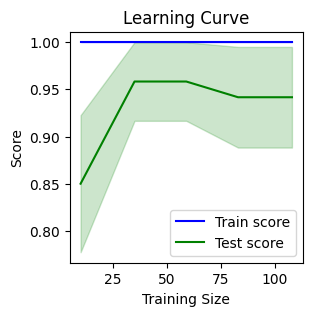

In [ ]:
from sklearn.model_selection import learning_curve 
import matplotlib.pyplot as plt


train_sizes, train_scores, test_scores = learning_curve(
    estimator= RandomForestClassifier(),
    X= X_train,
    y= y_train,
    cv= 10,
    n_jobs= -1
)
train_scores_mean = train_scores.mean(axis= 1)
test_scores_mean = test_scores.mean(axis= 1)
train_scores_std = train_scores.std(axis= 1)
test_scores_std = test_scores.std(axis= 1)
plt.figure(figsize= (3, 3))
plt.plot(train_sizes, train_scores_mean, label= "Train score", color= "blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color= "blue", alpha= 0.2)
plt.plot(train_sizes, test_scores_mean, label= "Test score", color= "green")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color= "green", alpha= 0.2)
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend()


验证曲线：观察某个参数的影响。

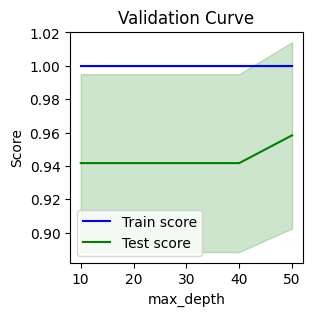

In [113]:
from sklearn.model_selection import validation_curve


param_range = [10, 20, 30, 40, 50]
train_scores, test_scores = validation_curve(
    estimator= RandomForestClassifier(),
    X= X_train,
    y= y_train,
    param_name= "max_depth",
    param_range= param_range,
    cv= 10,
    n_jobs= -1
)
train_scores_mean = train_scores.mean(axis= 1)
test_scores_mean = test_scores.mean(axis= 1)
train_scores_std = train_scores.std(axis= 1)
test_scores_std = test_scores.std(axis= 1)
plt.figure(figsize= (3, 3))
plt.plot(param_range, train_scores_mean, label= "Train score", color= "blue")
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color= "blue", alpha= 0.2)
plt.plot(param_range, test_scores_mean, label= "Test score", color= "green")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color= "green", alpha= 0.2)
plt.title("Validation Curve")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.legend()

# 6. <a id='toc6_'></a>[训练](#toc0_)

# 7. <a id='toc7_'></a>[评估](#toc0_)

✅ 模型评估方法总览:

| 任务类型  | 常见指标                   | 模块                        |
| ----- | ---------------------- | ------------------------- |
| 分类    | 准确率、精确率、召回率、F1、ROC AUC | `sklearn.metrics`         |
| 回归    | MSE、RMSE、MAE、R²        | `sklearn.metrics`         |
| 概率模型  | ROC 曲线、AUC、Log Loss    | `sklearn.metrics`         |
| 多模型评估 | 交叉验证                   | `sklearn.model_selection` |


## 7.1. <a id='toc7_1_'></a>[分类模型评估指标（sklearn.metrics）](#toc0_)

| 指标名称           | 数学公式                                                                                    | 含义 / 解释                 | 使用场景（分类）          |
| -------------- | --------------------------------------------------------------------------------------- | ----------------------- | ----------------- |
| Accuracy（准确率）  | $\frac{TP + TN}{TP + TN + FP + FN}$                                                     | 所有预测中，预测正确的比例           | 类别均衡的二/多分类        |
| Precision（精确率） | $\frac{TP}{TP + FP}$                                                                    | 被预测为正的样本中，实际为正的比例（少误判）  | 偏重“不要误抓”，如垃圾邮件识别  |
| Recall（召回率）    | $\frac{TP}{TP + FN}$                                                                    | 实际为正的样本中，被预测出来的比例（少漏检）  | 偏重“不要漏掉”，如疾病筛查    |
| F1 分数          | $\frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$ | 精确率和召回率的调和平均            | 分类不均衡时使用多；两者都要兼顾  |
| ROC 曲线         | 横轴：$\text{FPR} = \frac{FP}{FP + TN}$ <br>纵轴：$\text{TPR} = \text{Recall}$                | 显示不同阈值下模型性能（TPR vs FPR） | 模型能力整体评估（曲线）      |
| AUC            | ROC 曲线下的面积 $AUC = \int_0^1 TPR(x) dx$                                                   | 正负样本排序正确的概率（越大越好）       | 分类任务泛化能力评估（0.5～1） |
| 混淆矩阵           | 表格结构： TP, FP, TN, FN                                                                    | 可视化分类结果的分布              | 所有分类任务都适用         |


- accuracy_score(y_true, y_pred)：准确率

- precision_score(y_true, y_pred)：精确率（正例预测中有多少是真正的）

- recall_score(y_true, y_pred)：召回率（实际正例中有多少被找出来）

- f1_score(y_true, y_pred)：调和平均，综合精确率和召回率

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average= 'weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average= 'weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average= 'weighted'):.4f}")

Confusion Matrix:
[[10  0  0]
 [ 0  8  2]
 [ 0  1  9]]
Accuracy: 0.9000
Precision: 0.9024
Recall: 0.9000
F1 Score: 0.8997


分类报告（一次输出全部指标）:

In [116]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred, target_names= df["class"].unique()))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.82      0.90      0.86        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



## 7.2. <a id='toc7_2_'></a>[二分类：ROC 曲线 和 AUC](#toc0_)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label= 1)

auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize= (3, 3))
plt.plot(fpr, tpr, label= f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle= "--", color= "red")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# 多分类会报错

## 7.3. <a id='toc7_3_'></a>[回归模型常用指标](#toc0_)

| 指标名称        | 数学公式                                                          | 含义 / 解释                 | 使用场景（回归）                |                     |             |
| ----------- | ------------------------------------------------------------- | ----------------------- | ----------------------- | ------------------- | ----------- |
| MAE（平均绝对误差） | (\frac{1}{n} \sum\_{i=1}^{n}                                  | y\_i - \hat{y}\_i       | )                       | 平均每个预测与真实值的误差，抗异常值强 | 稳健性好，异常值较多时 |
| MSE（均方误差）   | $\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$              | 偏差惩罚更强，误差平方，突出大误差       | 需强调大误差惩罚（如贷款违约预测）       |                     |             |
| RMSE（均方根误差） | $\sqrt{MSE}$                                                  | MSE 的平方根，单位与原值一致        | 同上，更易解释                 |                     |             |
| $R^2$（决定系数） | $1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$ | 模型解释的方差占总方差比例（越接近 1 越好） | 回归模型的拟合优度标准，0 表示很差，1 完美 |                     |             |


```python
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
```

| 指标                          | 含义             |
| --------------------------- | -------------- |
| `mean_squared_error` (MSE)  | 均方误差（越小越好）     |
| `mean_absolute_error` (MAE) | 平均绝对误差         |
| `r2_score`                  | 决定系数（越接近 1 越好） |


## 7.4. <a id='toc7_4_'></a>[交叉验证评估](#toc0_)

```python
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
print("平均准确率：", scores.mean())

```
可选的 scoring 参数：
- 分类：
  - 'accuracy'、'f1'、'roc_auc'、'precision'、'recall'
- 回归：
  - 'neg_mean_squared_error'、'r2'、'neg_mean_absolute_error'

# 8. <a id='toc8_'></a>[调参](#toc0_)

## 8.1. <a id='toc8_1_'></a>[模型参数选择](#toc0_)

| 方法                   | 特点           | 推荐场景        |
| -------------------- | ------------ | ----------- |
| `GridSearchCV`       | 精准但慢，尝试所有组合  | 参数不多，训练快的模型 |
| `RandomizedSearchCV` | 随机尝试部分组合，效率高 | 参数多，复杂模型    |
| 配合 `Pipeline`        | 数据预处理与建模一体化  | 正式建模推荐      |


# 9. <a id='toc9_'></a>[集成学习](#toc0_)

🧠 什么是集成学习（Ensemble Learning）？
- 集成学习是一种通过组合多个模型（基学习器）来提高整体预测性能的策略。
- >通俗地说：“三个臭皮匠，胜过一个诸葛亮”。多个弱模型联合决策，往往优于单个强模型。


✅ 集成学习分类：

| 类型           | 含义                   | sklearn中对应                                                                                |
| ------------ | -------------------- | ----------------------------------------------------------------------------------------- |
| **Bagging (Bootstrap Aggregating)**  | 对训练集进行有放回采样，并行训练多个模型，结果取平均（回归）或投票（分类）；降低方差，减少过拟合。有放回采样（Bootstrap）    | `BaggingClassifier`, `RandomForestClassifier`                                             |
| **Boosting** | 顺序训练模型，后一个模型修正前一个的错误；每轮重新赋权 | `GradientBoostingClassifier`, `HistGradientBoostingClassifier`, 可配合 `xgboost`, `lightgbm` |
| **Stacking** | 多模型预测作为新模型输入 ；❌ 不采样        | `StackingClassifier`                                                                      |
| **Voting**   | 多模型结果简单投票或平均         | `VotingClassifier`                                                                        |


✅ 总结：

| 方法               | 优点         | 缺点      |
| ---------------- | ---------- | ------- |
| RandomForest     | 稳定、快、不易过拟合 | 可解释性一般  |
| GradientBoosting | 精度高        | 容易过拟合、慢 |
| Voting           | 简单有效       | 模型需多样化  |
| Stacking         | 性能最强       | 结构复杂    |


## 9.1. <a id='toc9_1_'></a>[Bagging（以随机森林为代表）](#toc0_)

✅ 思想：
- 并行地训练多个子模型，每个模型在不同的 Bootstrap 子样本集 上训练。

🔁 采样方式：
- 从原始训练集 有放回随机采样 n 次
- 每个子模型使用一个不同的子集

```python
             ┌────────────┐
             │  Training  │
             │   Set      │
             └────────────┘
               ↙  ↓   ↘
          ┌────┐┌────┐┌────┐
          │ M1 ││ M2 ││ M3 │ ... 并行训练
          └────┘└────┘└────┘
             ↓    ↓     ↓
         ┌───────────────┐
         │ Voting/Averaging│ ← 集成输出
         └───────────────┘

```

- 每棵树是对不同样本 + 随机特征集的学习。
- 输出为多数投票（分类）或平均值（回归）。

In [129]:
from sklearn.ensemble import RandomForestClassifier 


model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

## 9.2. <a id='toc9_2_'></a>[Boosting（以梯度提升树为代表）](#toc0_)

✅ 思想：
- 串行训练多个弱学习器，每个学习器试图纠正前一个的错误。

🔁 样本加权：
- 开始所有样本等权
- 每轮后提升误分类样本的权重
- 后续模型关注“难学”的样本

```python
   ┌──────────────┐
   │ Training Set │
   └──────┬───────┘
          ↓
        ┌────┐
        │ M1 │ ← 初始模型
        └────┘
          ↓ Error
        ┌────┐
        │ M2 │ ← 更重视错误样本
        └────┘
          ↓
        ┌────┐
        │ M3 │ ← 修正前两个
        └────┘
          ↓
       加权合成最终输出
```

- 每一轮修正上一轮错误

- 学习率 learning_rate 控制步长

- 更容易过拟合，但性能更强

In [128]:
from sklearn.ensemble import GradientBoostingClassifier 


model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

👉 更推荐用：
- 也可以使用 XGBoost / LightGBM（需额外安装）

In [130]:
from sklearn.ensemble import HistGradientBoostingClassifier 


model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.9333333333333333

## 9.3. <a id='toc9_3_'></a>[Voting（简单模型组合）](#toc0_)

In [131]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC(probability=True)

voting = VotingClassifier(
    estimators=[('lr', model1), ('tree', model2), ('svc', model3)],
    voting='soft'  # 'hard' = 投票；'soft' = 概率平均
)

voting.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [134]:
pred = voting.predict(X_test)
accuracy_score(y_test, pred)

0.8333333333333334

## 9.4. <a id='toc9_4_'></a>[Stacking（堆叠模型）](#toc0_)

✅ 思想：
- 将多个模型的预测输出作为新特征，供第二层模型再训练预测。

❗重点：
- 基模型必须输出概率或类别
- 第二层模型需防止信息泄露（建议用 K 折交叉验证预测）

```python
       ┌──────────────┐
       │ Training Set │
       └────┬───┬─────┘
            ↓   ↓
         ┌────┐┌────┐  ← 多个基学习器（并行）
         │ M1 ││ M2 │
         └────┘└────┘
            ↓   ↓
       ┌────────────────┐
       │ Meta Learner M │ ← 以 M1 和 M2 的输出作为特征再训练
       └────────────────┘
```

In [135]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


base_models = [
    ('svc', SVC(probability=True)),
    ('tree', DecisionTreeClassifier())
]

stack = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()
)

stack.fit(X_train, y_train)


StackingClassifier(estimators=[('svc', SVC(probability=True)),
                               ('tree', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [136]:
pred = voting.predict(X_test)
accuracy_score(y_test, pred)

0.8333333333333334

## 9.5. <a id='toc9_5_'></a>[快速对比集成模型](#toc0_)

📊 不同集成方法优劣对比表:

| 方法       | 模型结构   | 并行/串行     | 是否采样  | 是否加权   | 抗过拟合能力   | 精度提升能力 | 训练速度  |
| -------- | ------ | --------- | ----- | ------ | -------- | ------ | ----- |
| Bagging  | 多模型平均  | ✅ 并行      | ✅ 有放回 | ❌ 等权   | ✅ 强      | ⚠️ 中等  | ✅ 快   |
| Boosting | 累积误差优化 | ❌ 串行      | ❌     | ✅ 加权样本 | ⚠️ 可能过拟合 | ✅ 很强   | ❌ 慢   |
| Stacking | 二层模型堆叠 | ✅ 并行 + 串行 | ❌     | ❌      | ✅ 一般     | ✅ 最高潜力 | ⚠️ 中等 |


In [ ]:
from sklearn.model_selection import cross_val_score


for model in [RandomForestClassifier(), GradientBoostingClassifier(), VotingClassifier()]:
    print(cross_val_score(model, X_train, y_train, cv=5).mean())


## 9.6. <a id='toc9_6_'></a>[何时选择哪种集成方法？](#toc0_)

| 场景/需求       | 推荐方法             | 原因         |
| ----------- | ---------------- | ---------- |
| 数据量大，模型快训练  | Bagging（RF）      | 并行训练快，稳定性高 |
| 精度要求高       | Boosting（GB、XGB） | 强纠错能力，适合比赛 |
| 想整合多个不同类型模型 | Stacking         | 自由组合，最强泛化  |
| 防止过拟合       | Bagging          | 减小方差       |
| 可解释性强       | 决策树 + RF         | 决策路径可视化    |


| 目标          | 首选方法                       | 原因         |
| ----------- | -------------------------- | ---------- |
| **稳定性、泛化强** | Bagging（RF）                | 抵抗过拟合      |
| **高精度竞赛**   | Boosting（XGBoost、LightGBM） | 弱模型叠加，提升准确 |
| **灵活组合模型**  | Stacking                   | 模型融合能力最强   |
| **训练速度快**   | Bagging                    | 并行训练效率高    |


# 10. <a id='toc10_'></a>[保存模型](#toc0_)

## 10.1. <a id='toc10_1_'></a>[使用 joblib（推荐方式）](#toc0_)

In [123]:
from joblib import dump, load

dump(model, ".cache/iris_model.joblib")
loaded_model = load(".cache/iris_model.joblib")